In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load data

In [2]:
df = pd.read_excel('Data_Train.xlsx')

# explore


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Observations:
*  Price is the only feature with int datatype
*  There are some NaN values in Route and Total_Stops

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# missing values

In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Observation: 
Since there is only 1 record with missing values, we can drop it.

In [9]:
print('shape of df before dropping NaN rows',df.shape)
df.dropna(axis=0,inplace=True)
print('shape of df after dropping NaN rows',df.shape)

shape of df before dropping NaN rows (10683, 11)
shape of df after dropping NaN rows (10682, 11)


# data cleaning

In [10]:
#cleaning the Date_of_Journey column
#method 1

# df['Journey_day'] = df['Date_of_Journey'].map(lambda x: x.split('/')).str[0].astype('int64')
# df['Journey_month'] = df['Date_of_Journey'].map(lambda x: x.split('/')).str[1].astype('int64')
# df['Journey_year'] = df['Date_of_Journey'].map(lambda x: x.split('/')).str[2].astype('int64')

In [27]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [11]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [30]:
a,b,c = df['Date_of_Journey'].map(lambda x: x.split('/')).str[:]

ValueError: too many values to unpack (expected 3)

In [12]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
#cleaning the Date_of_Journey column
#method 2

def change_dtype_to_datatime(col):
    '''
    this function takes input(column names) and changes the column dtype of the passed value to datetime using pandas.to_datetime() method
    input: column name
    output: returns nothing
    '''
    df[col] = pd.to_datetime(df[col],infer_datetime_format=True)

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

* columns that involve date and time here are Date_of_Journey, Dep_Time and Arrival_Time

In [15]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_dtype_to_datatime(i)
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

* dtype of the columns Date_of_Journey, Dep_Time and Arrival_Time has been changed
* now, we can retrieve date, month and year

In [16]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-09 05:50:00,2023-11-09 13:15:00,7h 25m,2 stops,No info,7662


In [17]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_year'] = df['Date_of_Journey'].dt.year

In [18]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-09 05:50:00,2023-11-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [19]:
def extract_hour_minute(dataframe, col):
    '''
    this function takes tqo parameters as input and create two new columns in dataframe for hour and minute
    input: param1 - dataframe name, param2 - column name
    output: returns nothing'''
    dataframe[col+'_hour'] = df[col].dt.hour
    dataframe[col+'_minute'] = df[col].dt.minute
    
for i in ['Dep_Time','Arrival_Time']:
    extract_hour_minute(df,i)

In [20]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-09 05:50:00,2023-11-09 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [48]:
df['Duration'][2].split()

['19h']

In [55]:
def clean_duration(x):
    if 'h' and 'm' in :
        print('yes')
#     elif 'h' in x.split(' '):
#         print('h')
#     elif 'm' in x.split(' '):
#         print('m')
#     else:
#         print('no')
clean_duration(df['Duration'][0])

AttributeError: 'list' object has no attribute 'str'

In [65]:
df['Duration'][0].split()

['2h', '50m']

In [66]:
df['Duration'][1].split()

['7h', '25m']

In [70]:
df['Duration'][2].split()

AttributeError: 'list' object has no attribute 'split'

# Analysis

## Question: which part of the day most of the flights takeoff?
note: categorize departure hours into differnt categories like 'early morning', 'Evening', 'noon', 'night', 'late night' 

In [21]:
df['Dep_Time_hour'].value_counts()

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_Time_hour, dtype: int64

In [23]:
def takeoff_time_mode(hour):
    if hour > 4 and hour <= 8:
        return 'early morning'
    elif  hour > 10 and hour <= 12:
        return 'morning'
    elif  hour > 12 and hour <= 16:
        return 'noon'
    elif  hour > 16 and hour < 20:
        return 'evening'
    elif  hour > 20 and hour <= 24:
        return 'night'
    else:
        return 'late night'

[]

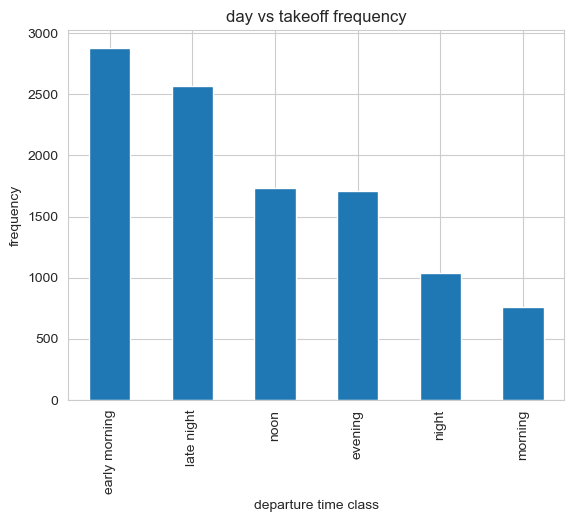

In [43]:
sns.set_style('whitegrid')
df['Dep_Time_hour'].apply(takeoff_time_mode).value_counts().plot.bar()
plt.xlabel('departure time class')
plt.ylabel('frequency')
plt.title('day vs takeoff frequency')
plt.plot()

### Observations:
*  Clearly, there are more flights that departure in the early morning.
*  There are less number of flights that departure at morning.